In [1]:
from skimage import io                    # utilities to read and write images in various formats
import numpy as np                        # array manipulation package
import matplotlib.pylab as plt            # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10) # set default figure size
plt.rcParams['image.cmap'] = 'gray'       # set default colormap to gray

# Digital Image Processing - Programming Assignment \#4

## Personal details:

* **Name(s) and student ID(s):** `PUT YOUR NAME(S) AND STUDENT ID(S) HERE.`
* **Contact information:** `PUT YOUR EMAIL ADDRESS(ES) HERE.`

# 6. Image restoration - Wiener filter

The aim of the following task is to try to restore the original image suffering from motion blur and additive Gaussian noise. First, read the part of course material concerning Wiener filtering and then perform the following operations in the reserved code cells and answer to the questions written in bold into the reserved spaces.

Let's first create motion blurred versions of the `jetplane.png` image with and without additive Gaussian noise.

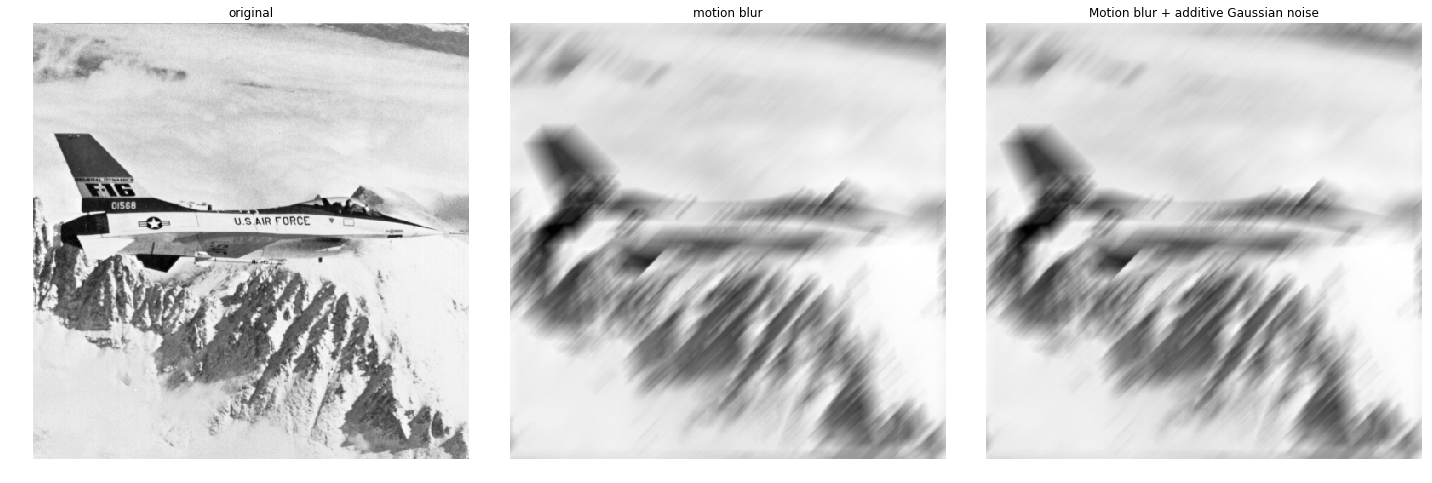

In [2]:
from skimage import img_as_float, util
from scipy import signal, ndimage

# read test image as float64 scaled to [0,1]
jetplane = img_as_float(io.imread('jetplane.png'))

# initialize PSF of motion blur filter with zeros
PSF = np.zeros((35, 35))

# create PSF image with a white horizontal line and rotate image 45 degrees
PSF[35//2, :] = 1.0
PSF = ndimage.rotate(PSF, 45, order=2, reshape=False)

# apply motion blur filter to the original image
jetplane_blurred = signal.convolve2d(jetplane, PSF, boundary='wrap',mode='same')

# normalize value range of the resulting image
jetplane_blurred = (jetplane_blurred - jetplane_blurred.min() ) / (jetplane_blurred.max() - jetplane_blurred.min())

# add some Gaussian noise to the motion blurred image
jetplane_blurredNoisy=util.random_noise(jetplane_blurred, mode='gaussian', var=0.000001)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(jetplane, cmap=plt.get_cmap('gray'))
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(jetplane_blurred, cmap=plt.get_cmap('gray'))
ax[1].set_title('motion blur')
ax[1].axis('off')
ax[2].imshow(jetplane_blurredNoisy, cmap=plt.get_cmap('gray'))
ax[2].set_title('Motion blur + additive Gaussian noise')
ax[2].axis('off')
fig.tight_layout()

**6.1. Apply Wiener filtering separately on the blurred image with and without additive Gaussian noise (`jetplane_blurredNoisy` and `jetplane_blurred`) using __[`skimage.restoration.wiener()`](http://scikit-image.org/docs/dev/api/skimage.restoration.html#skimage.restoration.wiener)__ function and `NSR=0` (`balance`). Then, display the two resulting images in the same figure and see what happens.**

In [3]:
from skimage import restoration

# set nsr (balance) to zero


# apply Wiener filter on 'jetplane_blurred'


# apply Wiener filter on 'jetplane_blurredNoisy'


# plot the two Wiener filtered images


As you can see, if Gaussian noise is not present, Wiener filter is able to restore the original image. However, the restoration fails completely when the image is corrupted also with Gaussian and it is not taken into an account (see the formula of Wiener filter!).

**6.2. Now, your task is to restore the image `jetplane_blurredNoisy` to original “as well as possible” using the `restoration.wiener()` function and display the original and the restored images into one figure.** 

Hint: A good choice of the `NSR` parameter for Wiener filter is important for successful outcome because the result is dominated by the effects of noise (again, see formula of Wiener filter). Try different `NSR` values and select the one that gives visually decent result, e.g. how well you can distinguish the plane type written on the vertical stabilizer and what the overall image quality is. Please note, however, that you will not get a perfect restoration because of the Gaussian noise!

In [4]:
# choose an 'NSR' value


# apply Wiener filter on the 'jetplane_blurredNoisy' image using 'NSR' of your choice


# display the original image and the restored image


**Which `NSR` value did you chose?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

**6.3. Finally, plot the restored images obtained by applying Wiener filtering on the noisy images, `jetplane_blurred` and `jetplane_blurredNoisy`, using both `NSR=0` and your choice of `NSR` in the same figure (altogether four images).** 

In [5]:
# apply Wiener filter also on the 'jetplane_blurred' image with you choice of 'NSR' value


# display the _four_ images in the same figure


**What does the parameter NSR represent?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

**Theoretically, what would the “correct” choice in stead of a _scalar_ NSR value?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

# 7. Colour image processing

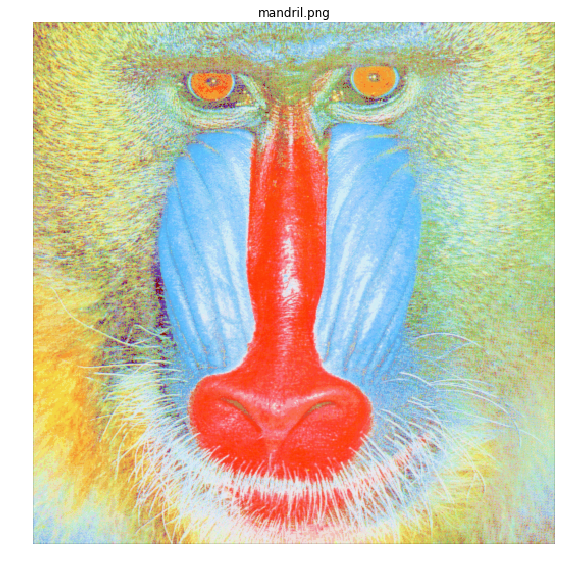

In [6]:
# read test image
mandril = io.imread('mandril.png')

# display the RGB image 
fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(mandril)
ax.set_title('mandril.png')
ax.axis('off')
fig.tight_layout()

The colours in the `mandril.png` image appear too bright and the contrast is low. As you know from Assignment \#1, this type of a problem can be corrected by applying contrast stretching. Furthermore, the image is slightly blurred, which can be corrected using a sharpening filter. When processing color images, the things are bit more tricky than in the first programming assignment because now the image consists of three individual color channels.

Now, perform the following operations in the reserved code cells and answer to the questions written in bold into the reserved spaces.

**7.1. Convert the `mandril.png` image into HSV colour space using __[`skimage.color.rgb2hsv()`](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2hsv)__ function. Then, display the image and the distribution (histogram) of its intensity values (V channel) in the same figure.**

In [7]:
from skimage import color, exposure

# change colour space from RGB to HSV


# display the RGB image and the histogram of the V channel


**7.2. Apply contrast stretching on the `V` channel so that the full intensity range is covered based on the 1st and 99th percentiles of the original grayscale distribution. Then, create a contrast-stretched colour image, and display it and the distribution of its intensity values in the same figure.**

Hint: You can create a copy of the original HSV image and then replace its `V` channel with the contrast-stretched version. For visualization purposes, you need to convert the colour image back to RGB space from HSV space.

In [8]:
from skimage import exposure

# perform contrast stretching on the V channel (see Assignment #1)


# create a contrast-stretched version of the colour image in HSV space 


# convert the contrast-stretched image from HSV to RGB


# display the contrast-stretched RGB image and the histogram 


**Why is the contrast stretching performed only to the `V` channel of the colour image?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

**7.3. Apply image sharpening on the `V` channel of the contrast-stretched colour image. Then, display the contrast-stretched colour image before and after sharpening in the same figure. Please note that again the use of `scipy.misc.imfilter()` is forbidden but you can reuse your image sharpening method from Assignment \#1 here, for instance.**

In [9]:
# perform image sharpening on the V channel using e.g. a Laplacian mask and convolution (see Assignment #1)


# create a contrast-stretched and sharpened version of the 'mandril' image


# convert the HSV image to RGB colour space for visualization


# display the contrast-stretched 'mandril' image before and after sharpening


**7.4. Finally, display the original mandril image, its contrast-stretched version and the final enhanced image in the same figure (altogether three images).**

In [10]:
# display the three different 'mandril' images


# 8. Wavelets and image compression

In the following, you will see what a multi-scale wavelet decomposition of an image looks like and how wavelets can be used for simple image compression by quantizing "less meaningful" detail coefficients. Your task is to just compare the image compression quality of two different wavelets, Haar and Daubechies.

Let's first read the test image `lighthouse.bmp` as `float64` type and display it:

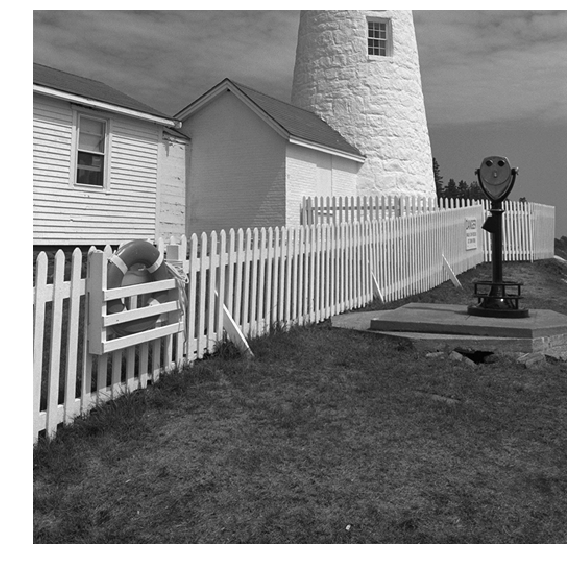

In [11]:
# read the test image
lighthouse = io.imread('lighthouse.bmp').astype(np.float64)

# display the test image
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(lighthouse, cmap=plt.get_cmap('gray'))
ax.axis('off')
fig.tight_layout()

Next we will define two utility functions used for plotting the wavelet composition of an image:

In [12]:
from scipy import misc

def wcodemat(x,nb):
    
    # apply pseudocolor matrix scaling for wavelet coefficiens
    x = x - x.min()
    max_val  = x.max()
    x = nb*(x/max_val)
    y = np.fix(x);
    
    return y

def plotwaveletcoeff(coeffs,dim0):
    
    # get the amount of decomposition levels
    levels = len(coeffs)-1
    
    # compute the dimensions of the highest level
    dim0=dim0/2**(levels)

    # get the approximation coefficients 
    I = coeffs[0]
    
    # scale their value range and size for image pyramid visualization purposes
    I = wcodemat(I, 255)
    I = misc.imresize(I, (dim0, dim0))
        
    # iterate trough the decomposition levels and repeat the same for horizontal,
    # vertical and diagonal detail coefficients and stack them into one figure
    for i, level in enumerate(coeffs[1:]):
        
        dim = dim0*2**(i)

        (cH, cV, cD)=level
        
        cH = wcodemat(cH, 255)
        cV = wcodemat(cV, 255)
        cD = wcodemat(cD, 255)
        cH = misc.imresize(cH, (dim, dim))
        cV = misc.imresize(cV, (dim, dim))
        cD = misc.imresize(cD, (dim, dim))

        I = np.vstack((np.hstack((I,cH)), np.hstack((cV,cD))))
    
    fig, ax = plt.subplots()
    ax.imshow(I, cmap=plt.get_cmap('gray'))
    ax.axis('off')
    fig.tight_layout()

Now, we will create a 3-level wavelet decomposition of the test image using Haar wavelets and __[`pywt.wavedec2()`](http://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2)__ function and display the outcome:

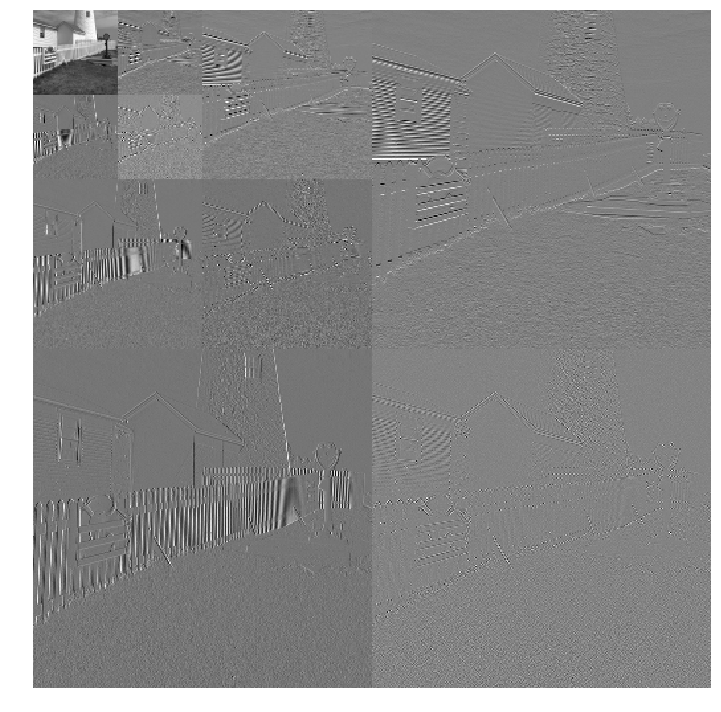

In [13]:
import pywt
# perform 3-level 2D wavelet decomposition using Haar wavelets
coeffs = pywt.wavedec2(lighthouse, 'haar', level=3)

# plot the wavelet coefficients (wavelet decomposition)
plotwaveletcoeff(coeffs,lighthouse.shape[0])

This image visualizes the 3-level 2D wavelet decomposition image pyramid that consists of the level-one approximation of the original image (lowpass filtered/downsampled version) and the horizontal, vertical and diagonal details (highpass filtered versions) for each level.

Next, we demonstrate image compression with wavelets by setting most of the detail coefficients to zero. This is a very primitive compression method just to illustrate how huge amount of less meaningful information can be thrown away without compromising the image quality too much.

First, we will determine a threshold for quantizing the detail coefficients. In our case, the threshold is the point where `85%` of absolute values of detail coefficients are smaller than the threshold value:

In [14]:
def get_details(coeffs):

    # concatenate all detail coefficients of the wavelet decomposition into single vector
    details = np.array([])
    
    for level in coeffs[1:]:
        (cH, cV, cD) = level
        details = np.hstack((details,cH.flatten(),cV.flatten(),cD.flatten()))
        
    return details

In [15]:
# concatenate all detail coefficients of the wavelet decomposition into single vector
details = get_details(coeffs)

# 85% of absolute values of detail coefficients are smaller than this threshold value
thresh = np.percentile(np.abs(details), 85.0)
print("Treshold limit: {0:0.2f}".format(thresh))

Treshold limit: 17.00


Then, we will set the details coefficients smaller than the threshold value to zero and reconstruct the image with quantized detail coefficients:

In [16]:
def quantize_coeffs(coeffs,thresh):
    
    # iterate trough the decomposition levels and 
    # quantize details based on the given threshold value
    for i, level in enumerate(coeffs[1:]):
        (cH, cV, cD) = level
        cH[np.abs(cH) < thresh] = 0.0
        cV[np.abs(cV) < thresh] = 0.0
        cD[np.abs(cD) < thresh] = 0.0
        coeffs[i+1] = (cH, cV, cD)
        
    return coeffs

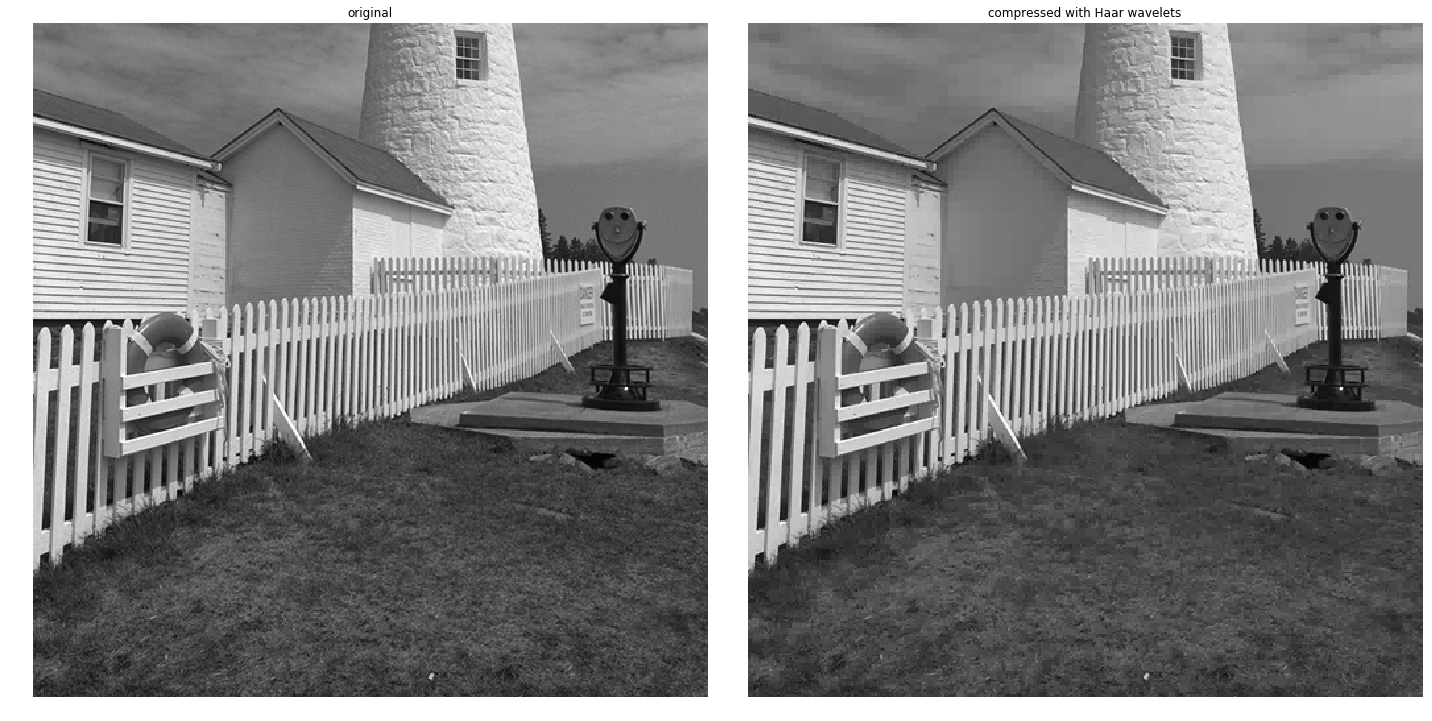

In [17]:
# set details below the given threshsold to zero
coeffs = quantize_coeffs(coeffs, thresh)

# reconstruct the compressed image
lighthouse_haar = pywt.waverec2(coeffs, 'haar')

# plot original image and compressed image
fig, ax = plt.subplots(1, 2)
ax[0].imshow(lighthouse, cmap=plt.get_cmap('gray'))
ax[0].axis('off')
ax[0].set_title('original')
ax[1].imshow(lighthouse_haar, cmap=plt.get_cmap('gray'))
ax[1].axis('off')
ax[1].set_title('compressed with Haar wavelets')
fig.tight_layout()

Some image compression artefacts can be seen in the reconstructed image but still the image quality is decent considering that `85%` of the least significant (smallest) detail coefficients have been quantized to zero.

Now, follow the same steps using Daubechies 2 wavelet (use `'db2'` instead of `'haar'`) in `pywt.wavedec2()` and `pywt.waverec2()`, and display the same images as well.

**8.1. Compute the 3-level wavelet decomposition of the test image using Daubechies 2 wavelets and `pywt.wavedec2()` function and display the outcome.**

In [18]:
# perform 3-level 2D wavelet decomposition using Daubechies 2 wavelets


# plot the wavelet coefficients (wavelet decomposition)


**8.2. Get the details coefficients of the resulting wavelet decomposition and compute the point where `85%` of absolute values of detail coefficients are smaller than the threshold value.**

In [19]:
# concatenate all detail coefficients of the wavelet decomposition into single vector


# compute threshold where 85% of absolute values of detail coefficients are smaller


# print the threshold value


**8.3. Quantize the detail coefficients based on the threshold value and reconstruct the image. Display the original image and the result of Daubechies 2 wavelet compression in the same figure.**

In [20]:
# quantize the detail coefficients based on the determined threshold value


# reconstruct the image compressed with Daubechies 2 wavelets


# display the original image and the compressed one


**8.4. Now, display the two images compressed with different wavelets, Haar and Daubechies 2, in the same figure.**

In [21]:
# display the outcome of the two primitive image compression methods


**Which wavelets produce a better visual quality?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

**8.5. To get some numerical evidence on your observations, compute the root mean square errors (RMSE) resulting from both Haar and Daubechies 2 based compression and print the RMSE values.**

In [22]:
# compute RMSE for both compression methods


# print the RMSE values

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

# References
`LIST YOUR REFERENCES HERE!`

# Submission

1. Click on the menu `Kernel -> Restart & Clear Output` to clear all outputs and variables, etc.
2. Compress the resulting Jupyter notebook (`DIP_PA4.ipynb` file) into **`DIP_PA4_[student number(s)].zip`** (e.g. `DIP_PA4_1234567.zip` if solo work or `DIP_PA4_1234567-7654321.zip` if pair work).
3. Upload the zip file to: https://www.dropbox.com/request/1L8CaUMjj1dZAzZldPWr